<a href="https://colab.research.google.com/github/AnastasiaaAlekseichuk/practice/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_4_3_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9%D1%87%D1%83%D0%BA_Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

Мы импортируем все библиотеки и сохраняем URL в переменной. Затем мы делаем HTTP запросить этот URL-адрес с помощью метода get для получения информации с этой веб-страницы.
Текстовый атрибут объекта запросов содержит данные HTML, которые передаются в функция pd.read_html. Эта функция возвращает список объектов DataFrame, содержащих различные таблицы на веб-странице. Поскольку на веб-странице есть только одна таблица, DataFrame (df) содержит только одну таблицу.

In [ ]:
#importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]


Изучаем  первые 5 записей: 

In [ ]:
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


Получение типов данных и пропущенных значений:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


Как мы видим, типы данных столбцов не в нужном нам формате. Gross столбец представляет собой числовой столбец. Однако этому столбцу был назначен тип данных объекта, поскольку он содержит как числовые, так и нечисловые
данные (символы типа “,”, “$”  и буквы типа «U» и «S»). Преобразуем данные:

# **Шаг 2. Обработка данных** 

На этом этапе мы:
  1. Удалим ненужные символы.
  2. Изменим типы данных.
  3. Удалим ненужные столбцы.
  4. Создадим новый столбец из существующего столбца.

Удалим ненужные строки из столбца **Gross**, оставив только
числовые значения:

In [ ]:
df['Gross'] = df['Gross'].str.replace(r"US\$","").str.replace(r",","")

 Первая замена
метод удаляет «US$», а второй метод замены удаляет запятые. Замена
символ с пустой строкой ("") эквивалентен удалению символа. Теперь давайте используем метод **astype** для приведения типа или изменения типа данных этого столбца на **int64**, чтобы этот столбец можно было использовать для вычислений и визуализаций:

In [ ]:
df['Gross'] = df['Gross'].astype('int64')

check:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     int64 
 4   Notes   50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [ ]:
df['Gross'].head(5)

0     6557062
1     2127871
2     2006033
3     2771269
4    16604101
Name: Gross, dtype: int64

Нам также нужно извлечь месяц из даты, сначала изменив тип данных столбца «Дата» и затем применив к нему метод **DatetimeIndex**, как показано ниже:

In [ ]:
df['Date'] = df['Date'].astype('datetime64')

In [ ]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

Наконец, мы удаляем два ненужных столбца из DataFrame, используя следующие
утверждение.

In [ ]:
df.drop(['#', 'Notes'], axis = 1, inplace = True)

In [ ]:
df

,Date,Film,Gross,Month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2
5,2018-02-11,Les Tuche 3,8753427,2
6,2018-02-18,Black Panther,7627163,2
7,2018-02-25,Black Panther,5637555,2
8,2018-03-04,La ch'tite famille,16739183,3
9,2018-03-11,La ch'tite famille,9546133,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    50 non-null     datetime64[ns]
 1   Film    50 non-null     object        
 2   Gross   50 non-null     int64         
 3   Month   50 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.7+ KB


# **Шаг 3: Визуализация**

 сначала мы создаем еще один DataFrame (df1), который содержит подмножество
столбцов, которые содержат исходный DataFrame (df). Этот DataFrame, df1, содержит всего два столбцы - «Фильм» (название фильма) и «Gross» (Выручка). Затем мы сортируем значения выручки в порядке убывания. 

In [ ]:
df1 = df[['Film', 'Gross']].sort_values(ascending=False, by='Gross')

В этот DataFrame добавляется нежелательный столбец («index»)

In [ ]:
#df1.drop(['index'],axis=1,inplace=True)

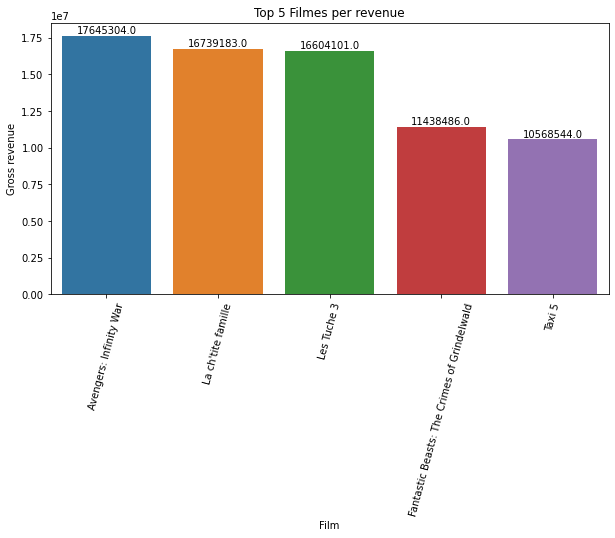

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Film',y='Gross', data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
ax.set_title("Top 5 Filmes per revenue")
ax.set_ylabel("Gross revenue")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center', va='bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

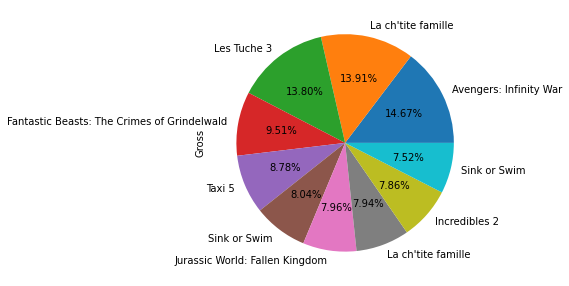

In [ ]:
df1['Gross'].head(10).plot(kind='pie', autopct='%.2f%%',labels=df1['Film'],
figsize=(10,5))

Сначала мы создаем еще один DataFrame, который собирает данные за месяц, вычисляя в среднем за каждый месяц

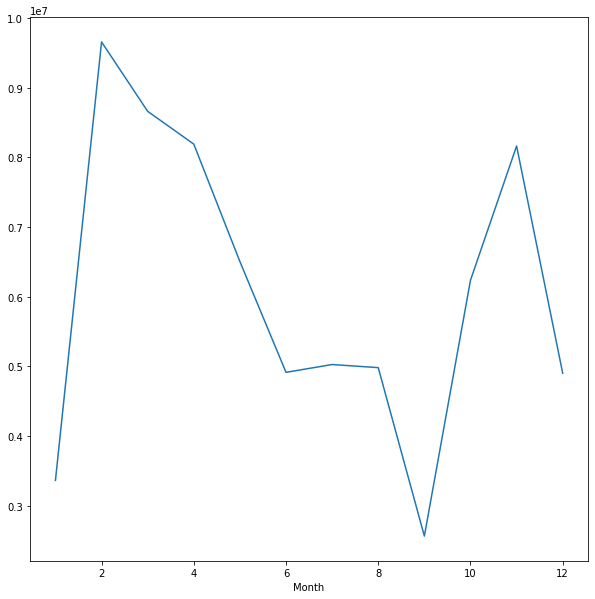

In [ ]:
df2=df.groupby('Month')['Gross'].mean()
df2.plot(kind='line',figsize=(10,10))

# **Шаг 4: построение выводов на основе анализа и визуализаций**

1. Средний ежемесячный доход сильно колеблется, возможно
зависит от месяца выпуска фильмов, который может требуют дальнейшего анализа на протяжении многих лет.
  2. Три самых прибыльных фильма во Франции в 2018 году вышли Avengers, La Ch’tite Famille и Les Tuche 3.

# Вариант 8

Провести анализ неструктурированных данных



Импорт данных и изучение характеристик наборов данных:

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
 int('')
 url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Japan'
 req=requests.get(url)
 data=pd.read_html(req.text)
except ValueError:
   pass      # or whatever
df=data[2]

In [ ]:
df.head()

,Film franchise/series,Gross revenue (¥ billion),Debut year,Ref
0,Doraemon,137.29,1980,[a]
1,Harry Potter,96.03,2001,[1]
2,Detective Conan (Case Closed),91.53,1997,[b]
3,Pokémon,89.08,1998,[c]
4,Godzilla (Gojira),58.17,1954,[d]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Film franchise/series      17 non-null     object 
 1   Gross revenue (¥ billion)  17 non-null     float64
 2   Debut year                 17 non-null     int64  
 3   Ref                        17 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 672.0+ bytes


Обработка данных:

Удалим ненужные строки из столбца Admissions (millions), оставив только
числовые значения:

In [ ]:
df['Gross revenue (¥ billion)'] = df['Gross revenue (¥ billion)'].replace(r".","")

In [ ]:
df.head()

,Film franchise/series,Gross revenue (¥ billion),Debut year,Ref
0,Doraemon,137.29,1980,[a]
1,Harry Potter,96.03,2001,[1]
2,Detective Conan (Case Closed),91.53,1997,[b]
3,Pokémon,89.08,1998,[c]
4,Godzilla (Gojira),58.17,1954,[d]


Теперь  используем метод **astype** для приведения типа или изменения типа данных этого столбца на **int64**, чтобы этот столбец можно было использовать для вычислений и визуализаций:

In [ ]:
df['Gross revenue (¥ billion)'] = df['Gross revenue (¥ billion)'].astype('int64')

check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film franchise/series      17 non-null     object
 1   Gross revenue (¥ billion)  17 non-null     int64 
 2   Debut year                 17 non-null     int64 
 3   Ref                        17 non-null     object
dtypes: int64(2), object(2)
memory usage: 672.0+ bytes


In [ ]:
df['Gross revenue (¥ billion)'].head(5)

0    137
1     96
2     91
3     89
4     58
Name: Gross revenue (¥ billion), dtype: int64

In [ ]:
df.drop(['Ref'],axis=1,inplace=True)

In [ ]:
df

,Film franchise/series,Gross revenue (¥ billion),Debut year
0,Doraemon,137,1980
1,Harry Potter,96,2001
2,Detective Conan (Case Closed),91,1997
3,Pokémon,89,1998
4,Godzilla (Gojira),58,1954
5,Dragon Ball,52,1986
6,Otoko wa Tsurai yo (Tora-san),51,1969
7,Star Wars,50,1977
8,Pirates of the Caribbean,43,2003
9,Bayside Shakedown,40,1998


Визуализация:

In [ ]:
df1=df[['Film franchise/series','Gross revenue (¥ billion)']].sort_values(ascending=False,by='Gross revenue (¥ billion)')

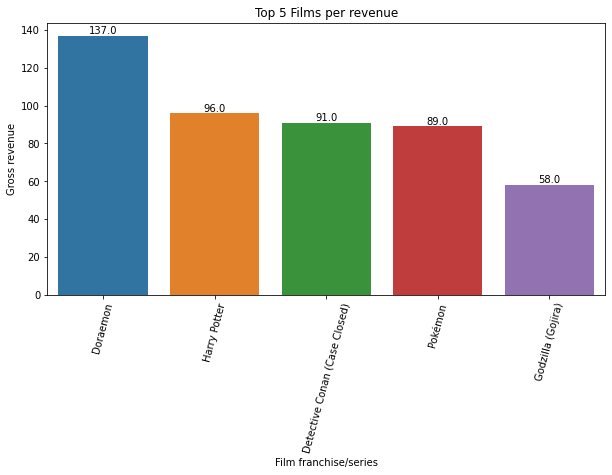

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Film franchise/series',y='Gross revenue (¥ billion)',data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['Film franchise/series'],rotation=75)
ax.set_title("Top 5 Films per revenue")
ax.set_ylabel("Gross revenue")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

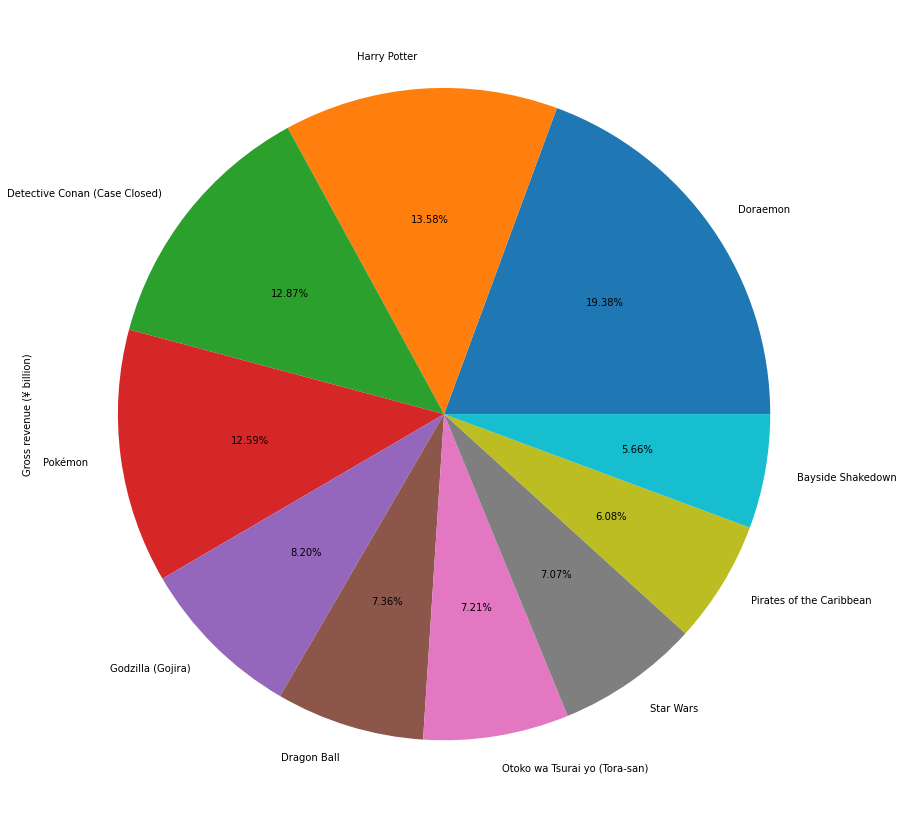

In [ ]:
df1['Gross revenue (¥ billion)'].head(10).plot(kind='pie',autopct='%.2f%%',labels=df1['Film franchise/series'],
figsize=(15,15))

Сначала создаем еще один DataFrame, который собирает данные за год, вычисляя в среднем за каждый год

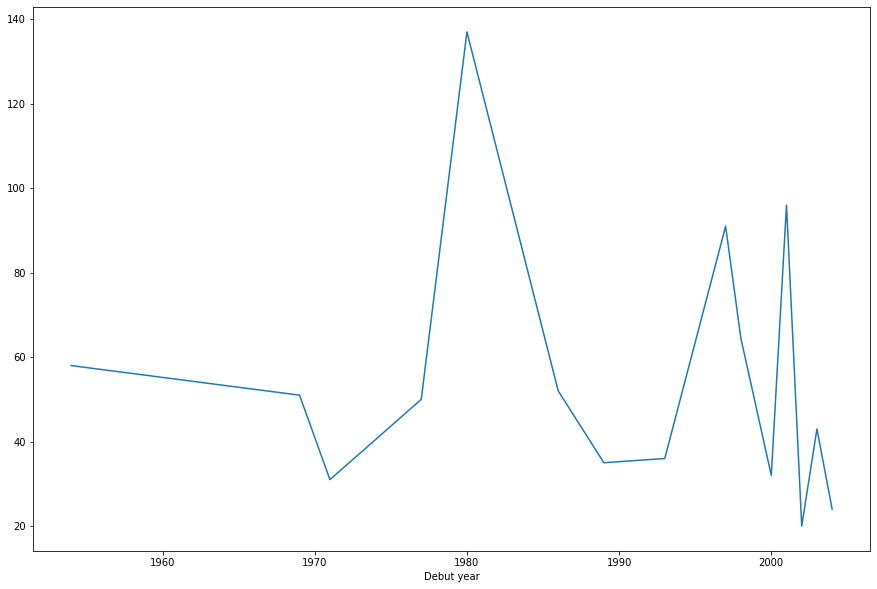

In [ ]:
df2=df.groupby('Debut year')['Gross revenue (¥ billion)'].mean()
df2.plot(kind='line',figsize=(15,10))